## Script exemplo para o curso Python LPM/2021-1
### Exemplos retirados da documentação do Pygeostat
### http://www.ccgalberta.com/pygeostat/examples.html

In [1]:
import pygeostat as gs
import numpy as np

import os, sys, time

import matplotlib.pyplot as plt

print ('pygeostat versão {}'.format(gs.__version__))
print ('numpy versão {}'.format(np.__version__))

pygeostat versão 1.1.0
numpy versão 1.19.5


### Algumas variáveis importantes

In [2]:
# arquivos de saida e temporários
work_folder = 'work-temp'
# vamos criar a pasta caso não exista
if not os.path.isdir(work_folder):
  os.mkdir(work_folder)
else:
  print ('Pasta de trabalho \'{}\' já existe.'.format(work_folder))

Pasta de trabalho 'work-temp' já existe.


In [3]:
# Vamos abrir um arquivo de exemplo
# Dentro do pygeostat tem alguns arquivos tipo gslib acessíveis pelo método ExampleData
# O oilsands está disponível no repositório em
# https://raw.githubusercontent.com/CcgAlberta/pygeostat/master/pygeostat/data/example_data/oilsands.dat

datafl = gs.ExampleData('oilsands')
print (type(datafl))
datafl.head()

<class 'pygeostat.data.data.DataFile'>


,Drillhole Number,East,North,Elevation,Bitumen,Fines,Chlorides,Facies Code
0,2.0,1245.0,10687.09,257.5,7.378,28.784,-9.0,-9.0
1,2.0,1245.0,10687.09,254.5,9.176,22.897,-9.0,-9.0
2,2.0,1245.0,10687.09,251.5,11.543,15.144,-9.0,-9.0
3,2.0,1245.0,10687.09,248.5,6.808,30.598,-9.0,-9.0
4,2.0,1245.0,10687.09,245.5,10.657,18.011,-9.0,-9.0


In [4]:
# O datafl.head() funcionou como em um dataframe do pandas
# Isso acontece porque o objeto datafl (DataFile) contém os dados em um dataframe mesmo
# Esse conhecimento nos dá liberdade de usar o df normalmente
# O dataframe é diretamente acessível usando

df = datafl.data.copy() # fiz uma cópia aqui do df

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5808 entries, 0 to 5807
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Drillhole Number  5808 non-null   float64
 1   East              5808 non-null   float64
 2   North             5808 non-null   float64
 3   Elevation         5808 non-null   float64
 4   Bitumen           5808 non-null   float64
 5   Fines             5808 non-null   float64
 6   Chlorides         5808 non-null   float64
 7   Facies Code       5808 non-null   float64
dtypes: float64(8)
memory usage: 363.1 KB
None


In [5]:
df.describe()

,Drillhole Number,East,North,Elevation,Bitumen,Fines,Chlorides,Facies Code
count,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000,5808.000000
mean,143.431302,1946.087970,7682.221741,228.315599,7.708852,28.707298,103.139353,40.099862
std,78.803650,797.529936,1546.319434,21.478426,5.136709,21.247085,286.545409,24.556658
min,2.000000,567.410000,5010.700000,146.500000,0.000000,0.861000,-9.000000,-9.000000
25%,76.000000,1348.590000,6499.410000,212.500000,2.877750,10.166000,-9.000000,50.000000
50%,144.000000,1708.200000,7280.700000,230.500000,7.480000,24.453000,5.400000,50.000000
75%,211.000000,2449.000000,8775.300000,245.500000,12.666000,42.823250,63.900000,50.000000
max,281.000000,3875.500000,10990.800000,275.500000,18.428000,86.777000,2602.000000,70.000000


In [6]:
print ('Lista de variáveis: {}'.format(datafl.variables))
print ('Lista de coordenadas: {}'.format(datafl.xyz))

Lista de variáveis: ['Bitumen', 'Fines', 'Chlorides']
Lista de coordenadas: ['East', 'North', 'Elevation']


findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


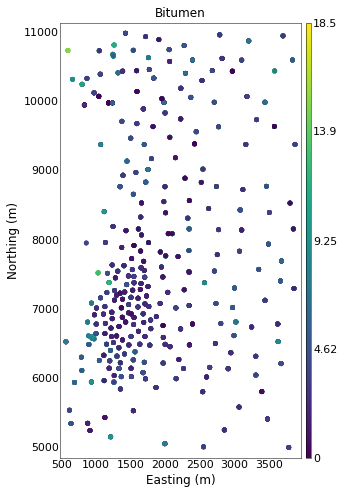

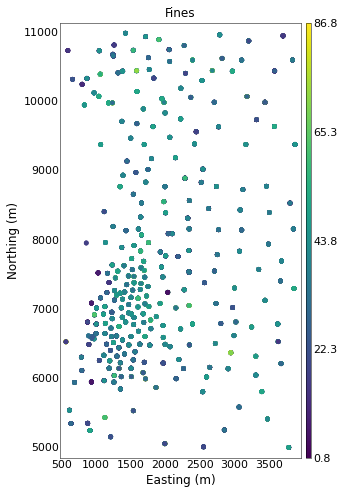

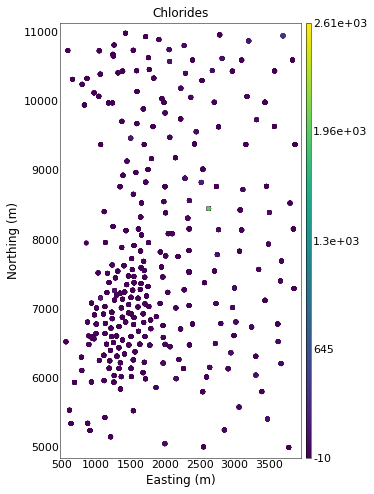

In [7]:
# O pygeostat tem um locmap 'empacotado'
for var in datafl.variables:
  gs.location_plot(datafl, var=var)

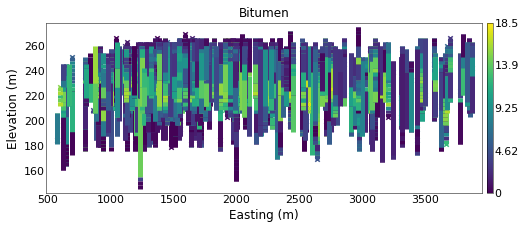

In [8]:
# Usando o eixo x e z
gs.location_plot(datafl, var='Bitumen', orient='xz', aspect = 10)

In [9]:
# Com o método spacing o pygeostat calcula a média da distância dos n viz. mais próximos
# Ele cria uma var nova
datafl.spacing(n_nearest=2)
datafl.head()

,Drillhole Number,East,North,Elevation,Bitumen,Fines,Chlorides,Facies Code,Data Spacing (m)
0,2.0,1245.0,10687.09,257.5,7.378,28.784,-9.0,-9.0,80.01377
1,2.0,1245.0,10687.09,254.5,9.176,22.897,-9.0,-9.0,80.01377
2,2.0,1245.0,10687.09,251.5,11.543,15.144,-9.0,-9.0,80.01377
3,2.0,1245.0,10687.09,248.5,6.808,30.598,-9.0,-9.0,80.01377
4,2.0,1245.0,10687.09,245.5,10.657,18.011,-9.0,-9.0,80.01377


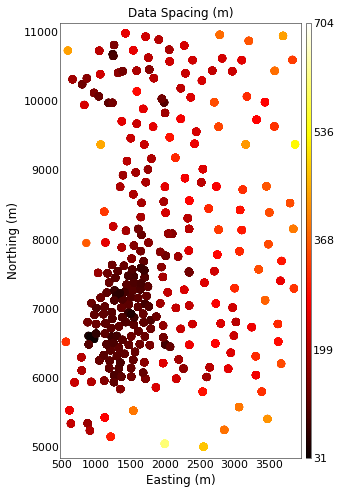

In [10]:
gs.location_plot(datafl, var='Data Spacing (m)', s=60, cmap='hot')

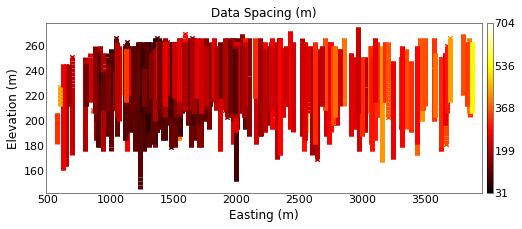

In [11]:
gs.location_plot(datafl, var='Data Spacing (m)', cmap='hot', orient='xz', aspect='10')

### Scatter plot

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


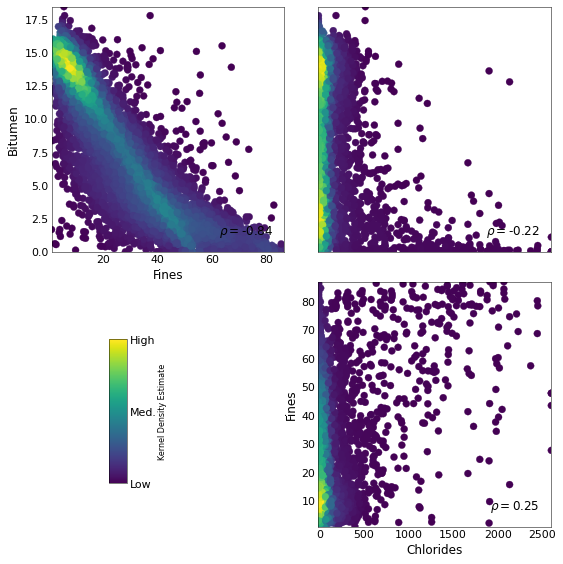

In [12]:
# precisamos colocar esse _ = ... porque senão o plot acontece duas vezes
_ = gs.scatter_plots(datafl)

### Histogramas

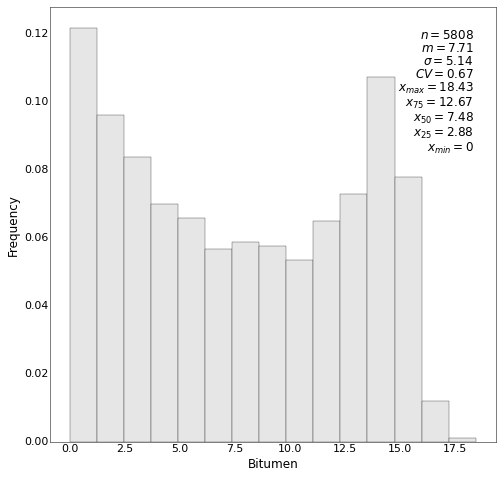

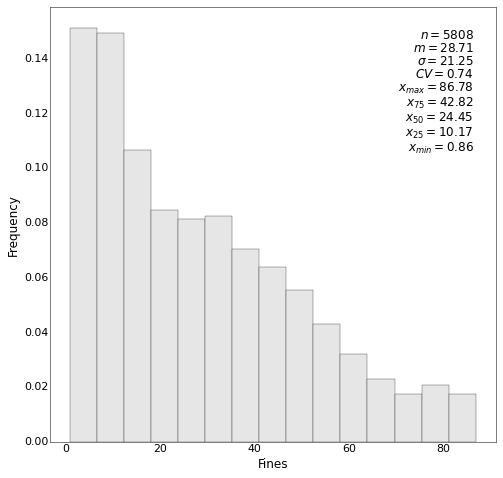

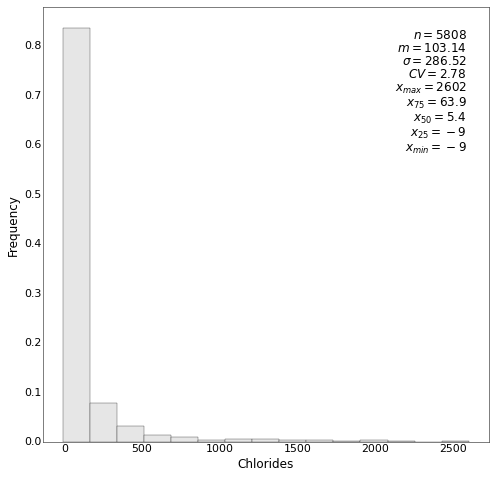

In [13]:
for var in datafl.variables:
  gs.histogram_plot(datafl, var=var)

## Executáveis gslib
### Vamos ver como listar os executáveis acessíveis e como baixar se for necessário

In [14]:
print (gs.list_executable())

['bicalib', 'cokb3d', 'scatsmth', 'rotcoord', 'histsmth', 'draw', 'bigaus', 'backtr', 'sasim', 'locmap', 'sisim_gs', 'sisim', 'postik', 'gtsim', 'vargplt', 'qpplt', 'gamv', 'bivplt', 'declus', 'histplt', 'nscore', 'lusim', 'scatplt', 'pixelplt', 'postsim', 'addcoord', 'pfsim', 'anneal', 'ellipsim', 'trans', 'sisim_lm', 'probplt', 'sgsim', 'kt3d', 'kt3d.par', 'ik3d', 'plotem', 'varmap', 'vmodel', 'kb2d', 'gam']


### Se for necessário podemos baixar os executáveis
#### Usamos o parâmetro 'source' pra definir se vamos baixar os executáveis disponíveis para o público geral ou se vamos baixar os executáveis restritos com um token

In [15]:
help(gs.get_executable)

Help on function get_executable in module pygeostat.utility.filemanagement:

get_executable(source='gslib', access_token=None, clean=False)
    Gets a collection of executable files from a protected repository using an access token. Note that in order to use this function, git needs to be installed on the target computer.
    
    Parameters:
        source (str): gslib or CCG as the source of software.
        access_token (str): An access token to authorize access to the target private repository for CCG software. Access token is available for CCG members and can be found at CCG knowledge base. 
        clean (bool): Option to clean the executable directory prior to upload the files from the target private repository. Note that choosing this option will delete the existing executable files.
    
    **Examples**
    
    Installing GSLIB executable files
    
    .. code-block:: python
        
        import pygeostat as gs
        gs.get_executable(source='GSLIB')
    
    .. image

## Vamos fazer os Variogramas

In [16]:
datafl.spacing(n_nearest=2)
datafl.head()

,Drillhole Number,East,North,Elevation,Bitumen,Fines,Chlorides,Facies Code,Data Spacing (m)
0,2.0,1245.0,10687.09,257.5,7.378,28.784,-9.0,-9.0,80.01377
1,2.0,1245.0,10687.09,254.5,9.176,22.897,-9.0,-9.0,80.01377
2,2.0,1245.0,10687.09,251.5,11.543,15.144,-9.0,-9.0,80.01377
3,2.0,1245.0,10687.09,248.5,6.808,30.598,-9.0,-9.0,80.01377
4,2.0,1245.0,10687.09,245.5,10.657,18.011,-9.0,-9.0,80.01377


In [17]:
lag_length_h = datafl['Data Spacing (m)'].values.mean()

print('Average data spacing in XY plane: {:.3f}{}'.format(
                                                        lag_length_h,
                                                        gs.Parameters['plotting.unit'],
                                                          ))

Average data spacing in XY plane: 199.533m


In [18]:
x_range = np.ptp(datafl[datafl.x].values)
y_range = np.ptp(datafl[datafl.y].values)
n_lag_x =  np.ceil((x_range * 0.5) /  lag_length_h)
n_lag_y =  np.ceil((y_range * 0.5) /  lag_length_h)
lag_tol_h = lag_length_h * 0.6

print ('x_range: {:.5}, y_range: {:.5}'.format(x_range, y_range))
print ('n_lag_x: {}, n_lag_y: {}'.format(n_lag_x, n_lag_y))
print ('lag_tol_h: {}'.format(lag_tol_h))



x_range: 3308.1, y_range: 5980.1
n_lag_x: 9.0, n_lag_y: 15.0
lag_tol_h: 119.71972013182652


## Variogramas com o Gamv

In [19]:
gamv = gs.Program('gamv')

# esse os.path.basename pega o nome do arquivo sem o caminho
print (os.path.basename(datafl.flname))

Unable to find the provided program! Trying to use the executable pool shipped with pygeostat!
oilsands.dat


In [20]:
# Vamos copiar o arquivo de dados para a pasta de execução.
# Isso facilita outras etapas da execução neste caso que estamos usando
# um arquivo de dados lá da pasta do módulo do pygeostat
os.system('cp {} .'.format(datafl.flname))

t_min = gs.Parameters['data.tmin']

# o arquivo de input para o gamv vai ser aquele que a gente copiou
datafl_input = os.path.basename(datafl.flname)
# o arquivo de output do gamv
output_gamv = os.path.join(work_folder, 'output_gamv.out')

lag_gamv_dist = 10
n_lags_gamv = 80

par_string = f'''
Parameters for GAMV
*******************

START OF PARAMETERS:
{datafl_input}               -file with data
2   3   4                         -   columns for X, Y, Z coordinates
1   6   6                         -   number of variables,col numbers
-989.00     1.0e21                -   trimming limits
{output_gamv}                          -file for variogram output
{n_lags_gamv}                                -number of lags
{lag_gamv_dist}                              -lag separation distance
10.0                               -lag tolerance
4                                 -number of directions
0.0  22.50 50.0 0.0  22.50  50.0  -azm,atol,bandh,dip,dtol,bandv
22.5  22.50 50.0 0.0  22.50  50.0  -azm,atol,bandh,dip,dtol,bandv
45.0  22.50 50.0 0.0  22.50  50.0  -azm,atol,bandh,dip,dtol,bandv
67.6  22.50 50.0 0.0  22.50  50.0  -azm,atol,bandh,dip,dtol,bandv
1                                 -standardize sills? (0=no, 1=yes)
1                                 -number of variograms
1   1  1                          -tail var., head var., variogram type
'''

gamv.run(par_string)


Calling:  ['/home/attila/.local/lib/python3.8/site-packages/pygeostat/executable/gamv', 'temp']

 GAMV Version: 3.000

  data file = oilsands.dat                            
  columns for X,Y,Z =  2 3 4
  number of variables =  1
  columns =  6
  trimming limits =  -989. 1.E+21
  output file = work-temp/output_gamv.out               
  number of lags =  80
  lag distance =  10.
  lag tolerance =  10.
  number of directions =  4
  azm, atol, bandwh =  0. 22.5 50.
  dip, dtol, bandwd =  0. 22.5 50.
  azm, atol, bandwh =  22.5 22.5 50.
  dip, dtol, bandwd =  0. 22.5 50.
  azm, atol, bandwh =  45. 22.5 50.
  dip, dtol, bandwd =  0. 22.5 50.
  azm, atol, bandwh =  67.6 22.5 50.
  dip, dtol, bandwd =  0. 22.5 50.
  flag to standardize sills =  1
  number of variograms =  1
  tail,head,type =  1 1 1

 maxdat =  5808
 Variable number  1
   Number   =  5808
   Average  =  28.707298
   Variance =  451.3609

 Variogram  1 Semivariogram          :  tail=Fines        head=Fines          
   current

## Vamos criar uma modelagem com o vmodel pra plotar junto com o variog. exp.

### Modelagem com vmodel

In [37]:
vmodel = gs.Program('vmodel')

vmodel_output_file = os.path.join(work_folder, 'vmodel_out.dat')

par_string = f'''
Parameters for VMODEL
                  *******
START OF PARAMETERS:
{vmodel_output_file}                   -file for variogram output
4   80                       -number of directions and lags
0.0   0.0    10.0            -azm, dip, lag distance
45.0   0.0    10.0            -azm, dip, lag distance
90.0   0.0    10.0            -azm, dip, lag distance
135.0   0.0    10.0            -azm, dip, lag distance
1    0.1                     -nst, nugget effect
1    0.9  0.0   0.0   0.0    -it,cc,ang1,ang2,ang3
100.0   100.0  10.0    -a_hmax, a_hmin, a_vert
'''

vmodel.run(par_string)

Unable to find the provided program! Trying to use the executable pool shipped with pygeostat!
Calling:  ['/home/attila/.local/lib/python3.8/site-packages/pygeostat/executable/vmodel', 'temp']

 VMODEL Version: 3.000

  output file = work-temp/vmodel_out.dat                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
  ndir,nlag =  4 80
  azm, dip, lag =  0. 0. 10.
  x,y,z offsets =  0. 10. 0.

  azm, dip, lag =  45. 0. 10.
  x,y,z offsets =  7.071068 7.071068 0.

  azm, dip, lag =  90. 0. 10.
  x,y,z offsets =  10. -4.371139E-7 0.

  azm, dip, lag =  135. 0. 10.
  

### Vou criar uma função aqui pra plotar a modelagem e o variog. exp.
[o certo é colocar essa função em um módulo acessório ou no início do script]

Existem também alguns executáveis do gslib que fazem essa função

O arquivo work-temp/output_gamv.out lido tem 82 lags e 4 direcoes.
O arquivo work-temp/vmodel_out.dat lido tem 82 lags e 3 direcoes.


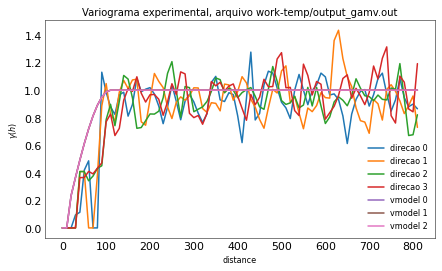

In [38]:
def plot_gamv_output(filename, filename_vmodel=None, type_xaxis='lag', lag_dist_gamv=None, lag_dist_vmodel=None):
    '''
    # Vou considerar uma saida tipica como a seguir. Os dados ficam em linhas com 6 valores
    Semivariogram           tail:Fines        head:Fines         direction  1 
   1        0.000      0.00000     5808       28.70730       28.70730
    '''
    
    # Para o vmodel gravado o template eh [estranho que tem duas linhas '1']
    '''
   Model Variogram for Direction:  1
   1     0.000      0.00000      4      1.00000      1.00000
   1     0.000      0.00000      4      1.00000      1.00000
   2     1.000      0.01500      4      0.98500      0.98500
   3     2.000      0.03000      4      0.97000      0.97000
    '''
    
    # Esse bloco eh pra ler o gamv
    file_ = open(filename)
    direcoes_count = 0
    nlag = 0
    vetor_dados_1_direcao_gamv = list()
    matriz_dados_direcoes_gamv = list()
    for line in file_.readlines():
      if len(line.split()) == 6:
            # dados
            data = float(line.split()[2])
            nlag = nlag + 1
            vetor_dados_1_direcao_gamv.append(data)
      else:
        # nova direcao
        direcoes_count = direcoes_count + 1
        if direcoes_count > 1: # isso precisa pq a direcao 1 não tem dados ainda
          matriz_dados_direcoes_gamv.append(vetor_dados_1_direcao_gamv)
        vetor_dados_1_direcao_gamv = list()
        nlag = 0
        
    matriz_dados_direcoes_gamv.append(vetor_dados_1_direcao_gamv) # a ultima direcao
    
    m_gamv = np.array(matriz_dados_direcoes_gamv)
    print ('O arquivo {} lido tem {} lags e {} direcoes.'.format(filename, m_gamv.shape[1], m_gamv.shape[0]))

    # Esse bloco eh pra ler o vmodel
    m_vmodel = None
    if filename_vmodel and lag_dist_vmodel:
        file_ = open(filename_vmodel)
        direcoes_count = 0
        nlag = 0
        vetor_dados_1_direcao_vmodel = list()
        matriz_dados_direcoes_vmodel = list()
        flag_pulei_1a_linha = False
        for line in file_.readlines():
          if flag_pulei_1a_linha == False:
            flag_pulei_1a_linha = True
            continue
          if len(line.split()) == 6:
                # dados
                data = float(line.split()[2])
                nlag = nlag + 1
                vetor_dados_1_direcao_vmodel.append(data)
          else:
            # nova direcao
            direcoes_count = direcoes_count + 1
            if direcoes_count > 1: # isso precisa pq a direcao 1 não tem dados ainda
              matriz_dados_direcoes_vmodel.append(vetor_dados_1_direcao_vmodel)
            vetor_dados_1_direcao_vmodel = list()
            nlag = 0

        matriz_dados_direcoes_vmodel.append(vetor_dados_1_direcao_vmodel) # a ultima direcao

        m_vmodel = np.array(matriz_dados_direcoes_vmodel)
        print ('O arquivo {} lido tem {} lags e {} direcoes.'.format(filename_vmodel, m_vmodel.shape[1], m_vmodel.shape[0]))

    plt.figure(figsize=(7, 4))
    plt.clf()
    plt.title('Variograma experimental, arquivo {}'.format(filename))
    plt.ylabel('$\gamma(h)$')
    if type_xaxis.lower() == 'lag':
      plt.xlabel('lag (n)')
    elif type_xaxis.lower() == 'dist' or type_xaxis.lower() == 'distance':
      plt.xlabel('distance')
    else:
      print ('Nao entendi o parâmetro type_xaxis. Dever ser \'lag\' ou \'dist\' ')

    for i, direcao in enumerate(m_gamv):
        if type_xaxis.lower() == 'lag':
          plt.plot(np.arange(len(direcao))+0, direcao, '-', label='direcao {}'.format(i))
        elif type_xaxis.lower() == 'dist' or type_xaxis.lower() == 'distance':
          plt.plot((np.arange(len(direcao))+0)*lag_dist_gamv, direcao, '-', label='direcao {}'.format(i)) 
        else:
          print ('Nao entendi o parâmetro type_xaxis. Dever ser \'lag\' ou \'dist\' ')

    if filename_vmodel and lag_dist_vmodel:
        for i, direcao in enumerate(m_vmodel):
            if type_xaxis.lower() == 'lag':
              plt.plot(np.arange(len(direcao))+0, direcao, '-', label='vmodel {}'.format(i))
            elif type_xaxis.lower() == 'dist' or type_xaxis.lower() == 'distance':
              plt.plot((np.arange(len(direcao))+0)*lag_dist_vmodel, direcao, '-', label='vmodel {}'.format(i)) 
            else:
              print ('Nao entendi o parâmetro type_xaxis. Dever ser \'lag\' ou \'dist\' ')

        
    plt.legend()
    plt.show()

# se eu quiser plotar só o var exp
#plot_gamv_output(output_gamv)

# se eu quiser plotar o var exp e um modelo com distância
plot_gamv_output(output_gamv, filename_vmodel=vmodel_output_file, type_xaxis='dist', lag_dist_gamv=10, lag_dist_vmodel=10)


## Vamos Krigar com o kt3d

In [39]:
kt3d = gs.Program('kt3d')

kt3d_output_file = os.path.join(work_folder, 'kt3d_out.dat')

#lembrete do input file: datafl_input

Unable to find the provided program! Trying to use the executable pool shipped with pygeostat!


In [40]:
# o pygeostat tem uma função 
infer_griddef = datafl.infergriddef(blksize=[40, 40, 30])

# vou dar esse dir no grid inferido pra lembrar como pego as características do grid
print (dir(infer_griddef))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_block_volume', '_get_grid_array', '_parse_grid_string', 'block_volume', 'change_blocknum', 'change_blocksize', 'convert_to_2d', 'copy', 'count', 'extents', 'generate_grid_points', 'get_coordinates', 'get_index', 'get_index3d', 'get_slice_coordinate', 'get_slice_index', 'get_vertical_indices', 'grid_array', 'index1d_to_index3d', 'index3d_to_index1d', 'nx', 'ny', 'nz', 'origin', 'outline_points', 'pad_grid', 'random_indices', 'random_points', 'xlength', 'xlimits', 'xmn', 'xsiz', 'ylength', 'ylimits', 'ymn', 'ysiz', 'zlength', 'zlimits', 'zmn', 'zsiz']


In [41]:
par_string = f'''
Parameters for KT3D
                  *******************

START OF PARAMETERS:
{datafl_input}              -file with data
1  2  3  4  6  0                 -   columns for DH,X,Y,Z,var,sec var
-1.0e21   1.0e21                 -   trimming limits
0                                -option: 0=grid, 1=cross, 2=jackknife
xvk.dat                          -file with jackknife data
2   3   4    6    0              -   columns for X,Y,Z,vr and sec var
0                             -debugging level: 0,1,2,3
kt3d.dbg                         -file for debugging output
{kt3d_output_file}                         -file for kriged output
{infer_griddef.nx}   {infer_griddef.xmn}    {infer_griddef.xsiz}                  -nx,xmn,xsiz
{infer_griddef.ny}   {infer_griddef.ymn}    {infer_griddef.ysiz}                  -ny,ymn,ysiz
{infer_griddef.nz}   {infer_griddef.zmn}    {infer_griddef.zsiz}                  -nz,zmn,zsiz
1    1      1                    -x,y and z block discretization
1    8                           -min, max data for kriging
0                                -max per octant (0-> not used)
2580.0  2580.0  800.0                 -maximum search radii
 0.0   0.0   0.0                 -angles for search ellipsoid
0     2.302                      -0=SK,1=OK,2=non-st SK,3=exdrift
0 0 0 0 0 0 0 0 0                -drift: x,y,z,xx,yy,zz,xy,xz,zy
0                                -0, variable; 1, estimate trend
extdrift.dat                     -gridded file with drift/mean
4                                -  column number in gridded file
1    0.20                         -nst, nugget effect
1    0.80  0.0   0.0   0.0        -it,cc,ang1,ang2,ang3
         200.0  200.0  200.0        -a_hmax, a_hmin, a_vert
'''

print (par_string)

kt3d.run(par_string)


Parameters for KT3D
                  *******************

START OF PARAMETERS:
oilsands.dat              -file with data
1  2  3  4  6  0                 -   columns for DH,X,Y,Z,var,sec var
-1.0e21   1.0e21                 -   trimming limits
0                                -option: 0=grid, 1=cross, 2=jackknife
xvk.dat                          -file with jackknife data
2   3   4    6    0              -   columns for X,Y,Z,vr and sec var
0                             -debugging level: 0,1,2,3
kt3d.dbg                         -file for debugging output
work-temp/kt3d_out.dat                         -file for kriged output
83   582.0    40.0                  -nx,xmn,xsiz
150   5025.0    40.0                  -ny,ymn,ysiz
5   156.0    30.0                  -nz,zmn,zsiz
1    1      1                    -x,y and z block discretization
1    8                           -min, max data for kriging
0                                -max per octant (0-> not used)
2580.0  2580.0  800.0         

### Vamos plotar a estimativa com a nossa receita pcolormesh

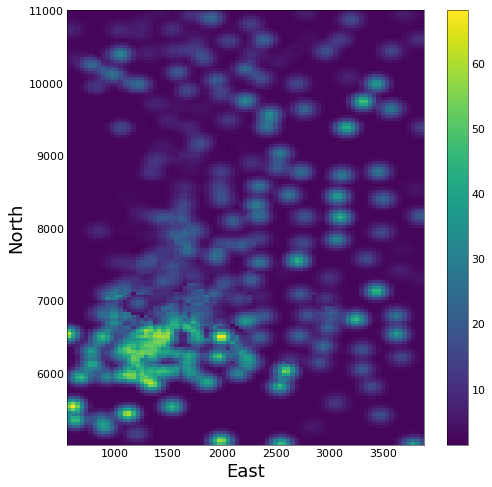

In [42]:
v = np.loadtxt(kt3d_output_file, skiprows=4)
v = v[:, 0] # 1a coluna é a estimativa

# trocar os negativos pra NaN
v[v<0] = np.nan

ny = infer_griddef.ny
nx = infer_griddef.nx
nz = infer_griddef.nz
xo = infer_griddef.xmn
yo = infer_griddef.ymn
dx = infer_griddef.xsiz
dy = infer_griddef.ysiz

m = v.reshape((nz, ny, nx))
xvec = np.arange(xo, xo+(nx+1)*dx, dx) 
yvec = np.arange(yo, yo+(ny+1)*dy, dy)

plt.clf()
# como o grid é 3d precisamos escolher uma 'folha' pra plotar m[0, :, :]
plt.pcolormesh(xvec - dx/2, yvec - dy/2, m[0, :, :], shading='auto')
plt.xlabel('East', fontsize=18)
plt.ylabel('North', fontsize=18)
plt.colorbar()
plt.show()

### Agora a variância de krigagem também

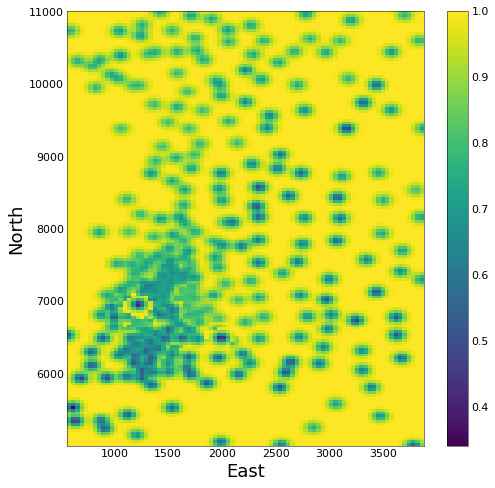

In [43]:
v = np.loadtxt(kt3d_output_file, skiprows=4)
v = v[:, 1] # 1a coluna é a variância de krigagem

# trocar os negativos pra NaN
v[v<0] = np.nan

m = v.reshape((nz, ny, nx))

plt.clf()
plt.pcolormesh(xvec - dx/2, yvec - dy/2, m[0, :, :], shading='auto')
plt.xlabel('East', fontsize=18)
plt.ylabel('North', fontsize=18)
plt.colorbar()
plt.show()